In [1]:
import numpy as np
from matplotlib import pyplot as plt


from my_utils import *
from sigproc_kit import *

import WR620ZI as lecroy
lecroy.init("192.168.0.208")


*IDN?
LECROY,WR620ZI,LCRY2805N57162,8.5.1
successfully connected to Lecroy scope!


1

In [2]:
##################################################
##           configure LeCroy Scope             ##
##################################################

#lecroy.clear_all()

s = {
    "input"   :"M2", 
    "filt1"   :"M1", 
    "filt2"   :"M4", 
    "ramp"    :"M3", 
}



In [3]:
##################################################
##              capture waveforms               ##
##################################################

time, wfm = lecroy.capture_waveforms([
    s["input"],
    s["filt1"],
    s["filt2"],
    s["ramp"],
  ],
    average=1
)



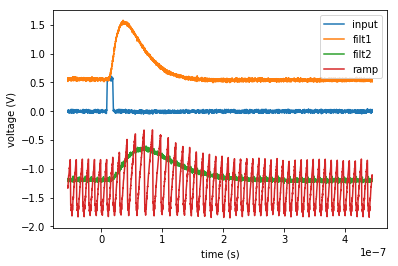

In [4]:
##################################################
##                     plot                     ##
##################################################


plt.plot(time, wfm[s["input"]] ,label="input")
plt.plot(time, wfm[s["filt1"]] ,label="filt1")
plt.plot(time, wfm[s["filt2"]] ,label="filt2")
plt.plot(time, wfm[s["ramp"]] ,label="ramp")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

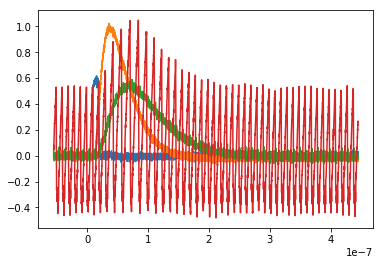

In [6]:
sig_in = remove_baseline(wfm[s["input"]])
filt1 = remove_baseline(wfm[s["filt1"]])
filt2 = remove_baseline(wfm[s["filt2"]])
ramp = remove_baseline(wfm[s["ramp"]])

plt.plot(time,sig_in)
plt.plot(time,filt1)
plt.plot(time,filt2)
plt.plot(time,ramp)

In [7]:
import pandas as pd

In [12]:
df = pd.DataFrame(
    np.transpose(np.array([time,sig_in,filt1,filt2,ramp])),
    columns = ["time","sig_in","filt1","filt2","ramp"]
)

df.head(10)

,time,sig_in,filt1,filt2,ramp
0,-5.501364e-08,0.003321,-0.007734,0.022962,0.036713
1,-5.491362e-08,0.018687,-0.012281,0.009871,0.080053
2,-5.481360e-08,0.001461,-0.039429,-0.025683,0.049667
3,-5.471358e-08,-0.014663,-0.005529,-0.029266,0.071095
4,-5.461356e-08,0.017171,0.016038,-0.022238,0.093833
5,-5.451354e-08,-0.013767,0.013144,-0.000465,0.085496
6,-5.441352e-08,0.014001,0.021895,0.004083,0.107132
7,-5.431350e-08,0.008007,-0.009043,-0.003566,0.122015
8,-5.421348e-08,0.002150,0.018587,-0.005908,0.143237
9,-5.411346e-08,0.017515,0.010939,0.005185,0.169351


In [13]:
pickle_this(df,"wfm_df")

saving to /workdir/jupyter/misc_mw/2022-02-02_qfm_premp_waveforms/scope_get_memory_waveforms_data/wfm_df.pickle
